In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import CSV

In [2]:
df = pd.read_csv('bankNoteAuth.csv')
#df

## Data Preprocessing

check whether there is missing values

In [3]:
df.isnull().sum()

V1    0
V2    0
dtype: int64

Check whether it is numerical data

In [4]:
df.dtypes

V1    float64
V2    float64
dtype: object

Check whether the data is skewed

Text(0.5, 1.0, 'Histogram of V1')

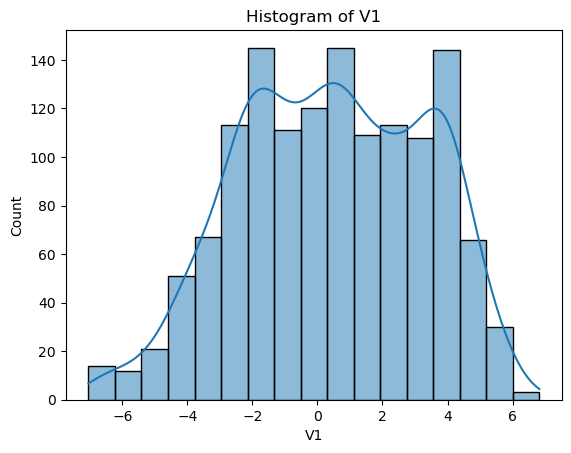

In [5]:
# V1 Skewness
title = plt.subplot()
sns.histplot(data=df, x="V1", kde=True)
title.set_title("Histogram of V1")

Text(0.5, 1.0, 'Histogram of V2')

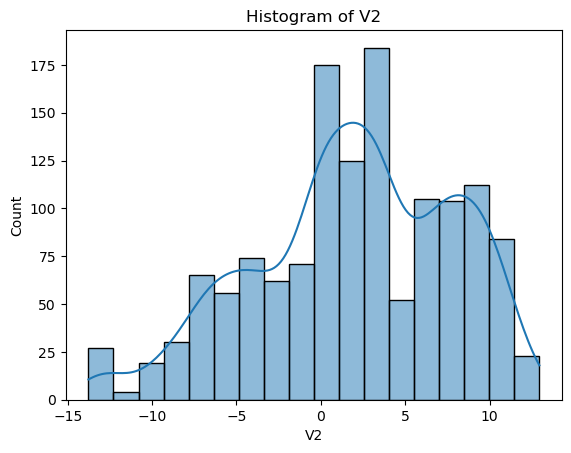

In [6]:
# V2 Skewness
title = plt.subplot()
sns.histplot(data=df, x="V2", kde=True)
title.set_title("Histogram of V2")

Check whether the data have the same mean or not

In [7]:
v1_mean = df["V1"].mean()
v2_mean = df["V2"].mean()
print("V1 mean: " + str(v1_mean))
print("V2 mean: " + str(v2_mean))

V1 mean: 0.43373525728862977
V2 mean: 1.9223531209912554


Check the linearity of the data

<AxesSubplot:>

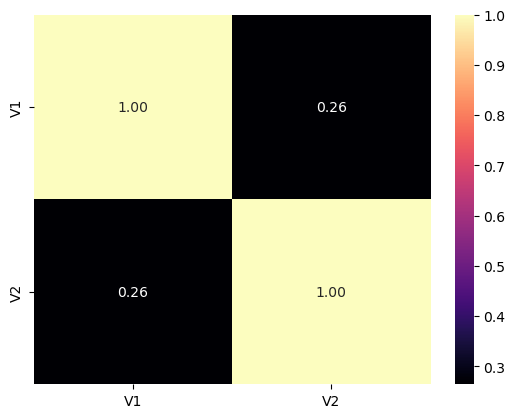

In [8]:
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [9]:
print("Banks : ", df.shape[0])
print("features : ", df.shape[1])

Banks :  1372
features :  2


In [10]:
X = df.iloc[:,1:3]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

## Training

Finding the suitable K for K-mean

In [12]:
from sklearn.cluster import KMeans
k_meansclus = range(1,10)
sse = []

for k in k_meansclus:
  km = KMeans(n_clusters =k)
  km.fit(X)
  sse.append(km.inertia_)

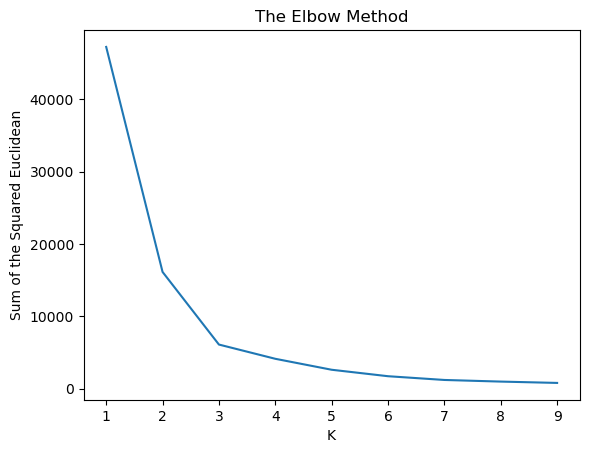

In [13]:
plt.title('The Elbow Method')
plt.plot(k_meansclus,sse)
plt.xlabel('K')
plt.ylabel('Sum of the Squared Euclidean')
plt.show()

In [14]:
km1 = KMeans(n_clusters=3)
km1.fit(X)
y_cluster = km1.predict(X)
y_cluster

array([0, 0, 2, ..., 2, 2, 1])

Text(0.5, 1.0, 'Predicted Clusters with the Cluster Centers')

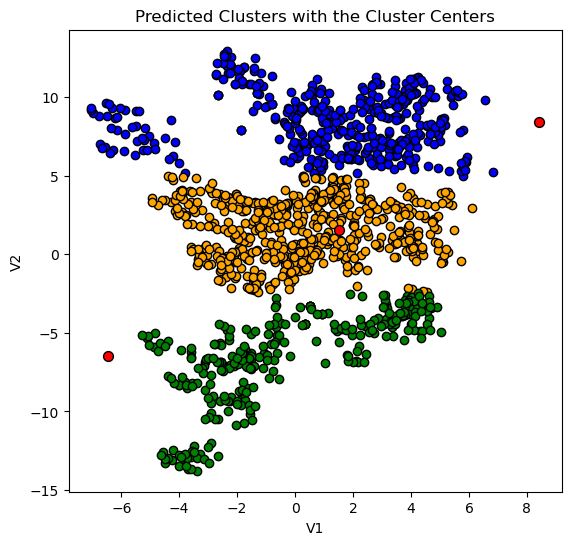

In [15]:
fig = plt.figure(figsize=(14, 6))
# predicted
ax1 = fig.add_subplot(121)
colours = ['blue','orange', 'green']
for idx in range(3):
    plt.scatter(df[y_cluster == idx]['V1'], df[y_cluster == idx]['V2'], c = colours[idx], edgecolor='k')
plt.scatter(km1.cluster_centers_[:3], km1.cluster_centers_[:3], s = 50, c = 'red', label = 'Centroids', edgecolor='k')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Predicted Clusters with the Cluster Centers')

## Model Evaluation

In [16]:
#Preparing the model
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 99)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

cv = KFold(n_splits=10, random_state=1, shuffle=True)

grid_params_knn = { 'n_neighbors' : range(1,20)}

gs = GridSearchCV(KNeighborsClassifier(), grid_params_knn, cv=cv)
gs.fit(X_train, y_train)
gs.best_params_

c:\Users\Tonkhaow\anaconda3\envs\cognitivePro\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
190 fits failed out of a total of 190.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Tonkhaow\anaconda3\envs\cognitivePro\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Tonkhaow\anaconda3\envs\cognitivePro\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "c:\Users\Tonkhaow\anaconda3\envs\cognitivePro\lib\site-packages\sklearn\neighbors\_base.py", line 420,

ValueError: Unknown label type: 'continuous'